In [249]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, confusion_matrix,precision_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from IPython.display import display, HTML

%matplotlib inline

In [144]:
df=pd.read_csv('./data/churn.csv').drop(columns=['RowNumber','Surname', 'CustomerId', 'Geography'], axis=1)
df.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1


In [145]:
df['Gender']=df['Gender'].apply(lambda x: 0 if x=='Female' else 1)

In [146]:
y = df["Exited"]
X = df.drop(["Exited"], axis = 1)

In [147]:
X.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,0,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57


### Cross-validation

### The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. 
It is defined as the average of recall obtained on each class.1 is the best and 0 is worse.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [148]:
y.shape, X.shape

((10000,), (10000, 9))

### The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)

### The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.1 is the best and 0 is worse.

unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

## Resampling Technique
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

## SMOTE

In [149]:
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 88)

In [150]:
X_train_set, X_val,y_train_set, y_val=train_test_split=train_test_split(X_train, y_train, test_size = 0.2, random_state = 88)

In [151]:
# I need to improve prediction on clients Exiting Bank. Target data will be resampled. I decided to balance oversapmling data using SMOT.
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='all', random_state=42)
X_sm,y_sm=sm.fit_resample(X_train_set, y_train_set)

In [152]:
y_train_set.shape, y_sm.shape

((6400,), (10212,))

In [153]:
print(y_train_set.value_counts())
print(y_sm.value_counts())

0    5106
1    1294
Name: Exited, dtype: int64
1    5106
0    5106
Name: Exited, dtype: int64


## STANDARDSCALER

In [154]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
X_sm=stand.fit_transform(X_sm)
X_val=stand.transform(X_val)
X_test=stand.transform(X_test)


## KNeighborsClassifier [1,3,5]

In [155]:
# from sklearn import neighbors
# knn_1 = neighbors.KNeighborsClassifier(n_neighbors=1)
# y_pred = knn_1.fit(X_train, y_train).predict(X_test)

In [156]:
# confusion_matrix(y_test, y_pred)

In [157]:
# print(classification_report(y_test, y_pred, digits=2))

In [158]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(knn_1, X_test, y_test)  # doctest: +SKIP
# plt.show()

In [159]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(knn_1, X_train, y_train, cv=10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [160]:
# from sklearn.metrics import balanced_accuracy_score
# balanced_accuracy_score(y_test, y_pred)

In [161]:
# from sklearn import neighbors
# knn_3 = neighbors.KNeighborsClassifier(n_neighbors=3)
# y_pred = knn_3.fit(X_train, y_train).predict(X_test)

In [162]:
# confusion_matrix(y_test, y_pred)

In [163]:
# print(classification_report(y_test, y_pred, digits=2))

In [164]:
# plot_confusion_matrix(knn_3, X_test, y_test)  # doctest: +SKIP
# plt.show()

In [165]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(knn_3, X_train, y_train, cv=10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [166]:
# from sklearn.metrics import balanced_accuracy_score
# balanced_accuracy_score(y_test, y_pred)

In [167]:
# from sklearn import neighbors
# knn_5 = neighbors.KNeighborsClassifier()
# y_pred = knn_5.fit(X_train, y_train).predict(X_test)

In [168]:
# confusion_matrix(y_test, y_pred)

In [169]:
# print(classification_report(y_test, y_pred, digits=2))

In [170]:
# plot_confusion_matrix(knn_5, X_test, y_test)  # doctest: +SKIP
# plt.show()

In [171]:
# scores = cross_val_score(knn_5, X_train, y_train, cv=10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [172]:
# from sklearn.metrics import balanced_accuracy_score
# balanced_accuracy_score(y_test, y_pred)

## Logistic Regression

In [173]:
# regr = LogisticRegression(random_state=0)
# y_pred=regr.fit(X_train, y_train).predict(X_test)

In [174]:
# confusion_matrix(y_test, y_pred)

In [175]:
# print(classification_report(y_test, y_pred, digits=2))

In [176]:
# plot_confusion_matrix(regr, X_test, y_test)  # doctest: +SKIP
# plt.show()

In [177]:
# scores = cross_val_score(regr, X_train, y_train, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [178]:
# from sklearn.metrics import balanced_accuracy_score
# balanced_accuracy_score(y_test, y_pred)

## DecisionTreeClassifier

In [179]:
# from sklearn.tree import DecisionTreeClassifier
# dtclf = DecisionTreeClassifier(random_state=0)
# y_pred=dtclf.fit(X_train, y_train).predict(X_test)

In [180]:
# confusion_matrix(y_test, y_pred)

In [181]:
# print(classification_report(y_test, y_pred, digits=2))

In [182]:
# plot_confusion_matrix(dtclf, X_test, y_test)  # doctest: +SKIP
# plt.show()

In [183]:
# scores=cross_val_score(dtclf, X_train, y_train)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [184]:
# from sklearn.metrics import balanced_accuracy_score
# balanced_accuracy_score(y_test, y_pred)

## RandomForestClassifier 

In [185]:
model = RandomForestClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_sm, y_sm, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % scores.mean())

Mean ROC AUC: 0.93093


## Tuning

In [214]:
# define grid
param_grid= {'n_estimators':[50,100,200],'max_depth':[None,3,5]}
model =RandomForestClassifier(random_state=42)

In [215]:
# define evaluation procedure
from sklearn.model_selection import GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_sm, y_sm)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.931696 using {'max_depth': None, 'n_estimators': 200}
0.928666 (0.006139) with: {'max_depth': None, 'n_estimators': 50}
0.930532 (0.006349) with: {'max_depth': None, 'n_estimators': 100}
0.931696 (0.006309) with: {'max_depth': None, 'n_estimators': 200}
0.876819 (0.008644) with: {'max_depth': 3, 'n_estimators': 50}
0.879341 (0.008563) with: {'max_depth': 3, 'n_estimators': 100}
0.881263 (0.008542) with: {'max_depth': 3, 'n_estimators': 200}
0.892551 (0.008255) with: {'max_depth': 5, 'n_estimators': 50}
0.894268 (0.008138) with: {'max_depth': 5, 'n_estimators': 100}
0.894339 (0.008072) with: {'max_depth': 5, 'n_estimators': 200}


In [217]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=200,random_state=0)
y_pred=rfclf.fit(X_sm, y_sm).predict(X_val)

In [218]:
confusion_matrix(y_val, y_pred)

array([[1083,  180],
       [ 139,  198]])

In [219]:
print(classification_report(y_val, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1263
           1       0.52      0.59      0.55       337

    accuracy                           0.80      1600
   macro avg       0.71      0.72      0.71      1600
weighted avg       0.81      0.80      0.80      1600



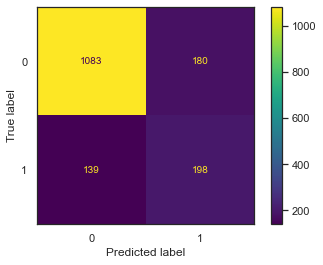

In [220]:
plot_confusion_matrix(rfclf, X_val, y_val)  # doctest: +SKIP
plt.show()

In [190]:
model = RandomForestClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_sm, y_sm, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.5f' % scores.mean())

Mean Accuracy: 0.85579


## GradientBoostingClassifier

In [191]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
model = GradientBoostingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_sm, y_sm, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.90782


In [192]:
# define grid
param_grid= {'n_estimators':[200, 500, 1000], 'learning_rate':[0.01,0.1]}
model =GradientBoostingClassifier(random_state=42)

In [193]:
# define evaluation procedure
from sklearn.model_selection import GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_sm, y_sm)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.918519 using {'learning_rate': 0.1, 'n_estimators': 1000}
0.888232 (0.007871) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.900797 (0.007912) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.907554 (0.007953) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.911845 (0.007639) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.916505 (0.006874) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.918519 (0.006495) with: {'learning_rate': 0.1, 'n_estimators': 1000}


In [194]:
clf = GradientBoostingClassifier(n_estimators=1000)
y_pred=clf.fit(X_sm, y_sm).predict(X_val)

In [195]:
confusion_matrix(y_val, y_pred)

array([[1061,  202],
       [ 133,  204]])

In [196]:
print(classification_report(y_val, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1263
           1       0.50      0.61      0.55       337

    accuracy                           0.79      1600
   macro avg       0.70      0.72      0.71      1600
weighted avg       0.81      0.79      0.80      1600



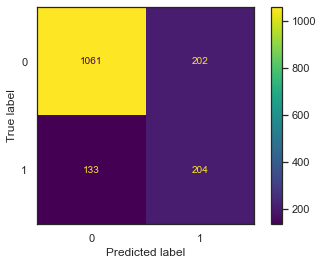

In [197]:
plot_confusion_matrix(clf, X_val, y_val)  # doctest: +SKIP
plt.show()

In [198]:
model = GradientBoostingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_sm, y_sm, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.5f' % scores.mean())

Mean Accuracy: 0.82743


### XGB

In [201]:
# count examples in each class
from collections import Counter
counter = Counter(y_sm)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 1.000


In [202]:
from xgboost import XGBClassifier
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_sm, y_sm, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % scores.mean())


Mean ROC AUC: 0.90773


In [203]:
 # define grid
param_grid= {'scale_pos_weight':[1,2], 'n_estimators':[50,100,300,500]}
model= XGBClassifier()

In [204]:
# define evaluation procedure
from sklearn.model_selection import GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_sm, y_sm)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.917539 using {'n_estimators': 500, 'scale_pos_weight': 2}
0.901067 (0.007919) with: {'n_estimators': 50, 'scale_pos_weight': 1}
0.900624 (0.008240) with: {'n_estimators': 50, 'scale_pos_weight': 2}
0.907732 (0.007998) with: {'n_estimators': 100, 'scale_pos_weight': 1}
0.907759 (0.007957) with: {'n_estimators': 100, 'scale_pos_weight': 2}
0.914268 (0.007515) with: {'n_estimators': 300, 'scale_pos_weight': 1}
0.914609 (0.007301) with: {'n_estimators': 300, 'scale_pos_weight': 2}
0.916791 (0.007260) with: {'n_estimators': 500, 'scale_pos_weight': 1}
0.917539 (0.006780) with: {'n_estimators': 500, 'scale_pos_weight': 2}


In [205]:
xgbc= XGBClassifier(scale_pos_weight=2, n_estimators=500, random_state=42)
xgbc.fit(X_sm, y_sm)
y_pred=xgbc.predict(X_val)


In [206]:
print(classification_report(y_val, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1263
           1       0.43      0.74      0.54       337

    accuracy                           0.74      1600
   macro avg       0.67      0.74      0.68      1600
weighted avg       0.81      0.74      0.76      1600



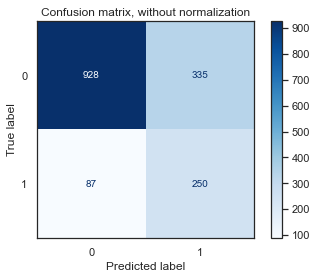

In [207]:
disp = plot_confusion_matrix(xgbc, X_val, y_val,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

In [208]:
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_sm, y_sm, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.5f' % scores.mean())

Mean Accuracy: 0.82589


## Precision_Recall
Example of Precision-Recall metric to evaluate classifier output quality.

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).
A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

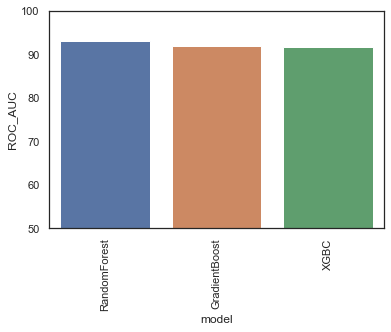

In [241]:
models = ['RandomForest','GradientBoost', 'XGBC']
cv_scores  = [93.17, 91.85, 91.75]
results = pd.DataFrame({'model': models, 'ROC_AUC': cv_scores})

ax = sns.barplot(x='model', y='ROC_AUC', data=results)
ax.set_ylim([50,100])
plt.xticks(rotation=90)
plt.show();

#display(results)

# Hold out test prediction

# Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=200,random_state=0)
y_pred=rf.fit(X_sm, y_sm).predict(X_test)
print(rf.predict_proba(X_test))

[[0.525 0.475]
 [0.96  0.04 ]
 [0.66  0.34 ]
 ...
 [0.42  0.58 ]
 [0.785 0.215]
 [0.98  0.02 ]]


In [225]:
rf_class_report=classification_report(y_test, y_pred, digits=2)
print(rf_class_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1594
           1       0.50      0.59      0.54       406

    accuracy                           0.80      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.80      0.80      2000



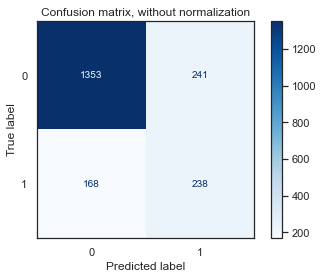

In [226]:
disp = plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

In [228]:
rf_matrix=confusion_matrix(y_test, y_pred)
print(rf_matrix)

[[1353  241]
 [ 168  238]]


# Gradient Boosting Class

In [231]:
gb = GradientBoostingClassifier(n_estimators=1000)
y_pred=gb.fit(X_sm, y_sm).predict(X_test)
print(gb.predict_proba(X_test))

[[0.25121962 0.74878038]
 [0.97573191 0.02426809]
 [0.73628008 0.26371992]
 ...
 [0.28482174 0.71517826]
 [0.50773148 0.49226852]
 [0.99738964 0.00261036]]


In [232]:
gb_class_report=classification_report(y_test, y_pred, digits=2)
print(gb_class_report)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1594
           1       0.48      0.61      0.54       406

    accuracy                           0.79      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.79      0.80      2000



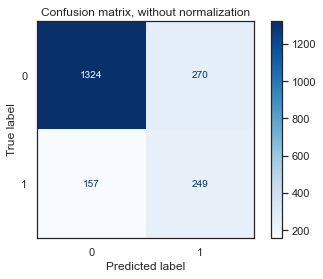

In [233]:
disp = plot_confusion_matrix(gb, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

In [234]:
gb_matrix=confusion_matrix(y_test, y_pred)
print(gb_matrix)

[[1324  270]
 [ 157  249]]


# XGBC

In [236]:
xgbc= XGBClassifier(scale_pos_weight=2, n_estimators=500, random_state=42)
y_pred=xgbc.fit(X_sm, y_sm).predict(X_test)
print(xgbc.predict_proba(X_test))

[[0.15596372 0.8440363 ]
 [0.95795256 0.04204743]
 [0.60793114 0.39206886]
 ...
 [0.15411079 0.8458892 ]
 [0.35054517 0.64945483]
 [0.99195623 0.00804374]]


In [237]:
xgbc_class_report=classification_report(y_test, y_pred, digits=2)
print(xgbc_class_report)

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1594
           1       0.43      0.75      0.55       406

    accuracy                           0.75      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82      0.75      0.77      2000



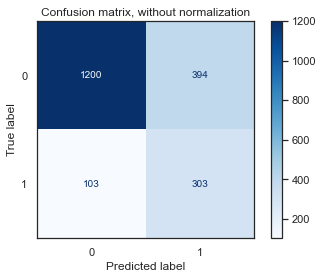

In [238]:
disp = plot_confusion_matrix(xgbc, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

In [239]:
xgbc_matrix=confusion_matrix(y_test, y_pred)
print(xgbc_matrix)

[[1200  394]
 [ 103  303]]


## Classification Report   SMOT

In [243]:
#classification_report
print("\nrandom forest classification report\n")
print(rf_class_report)
print("\ngradient boost classification report\n")
print(gb_class_report)
print("\nxgb classification report\n")
print(xgbc_class_report)


random forest classification report

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1594
           1       0.50      0.59      0.54       406

    accuracy                           0.80      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.80      0.80      2000


gradient boost classification report

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1594
           1       0.48      0.61      0.54       406

    accuracy                           0.79      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.79      0.80      2000


xgb classification report

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1594
           1       0.43      0.75      0.55       406

    accuracy                           0.75      2000
   macro avg       0.68

## Confusion Matrix 

In [244]:
#confusion matrix
print("\nrandom forest confusion matrix\n")
print(rf_matrix)
print("\ngradient boost confusion matrix\n")
print(gb_matrix)
print("\nxgb confusion matrix\n")
print(xgbc_matrix)


random forest confusion matrix

[[1353  241]
 [ 168  238]]

gradient boost confusion matrix

[[1324  270]
 [ 157  249]]

xgb confusion matrix

[[1200  394]
 [ 103  303]]


# Model pick


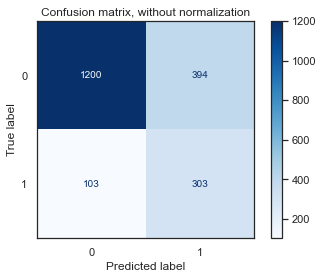

<Figure size 432x288 with 0 Axes>

In [245]:
disp = plot_confusion_matrix(xgbc, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()
plt.savefig('XGBCSMOT')

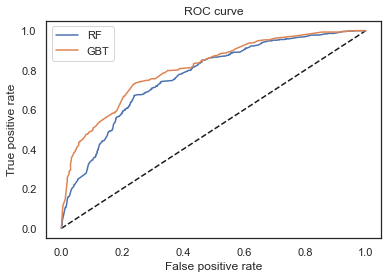

<Figure size 432x288 with 0 Axes>

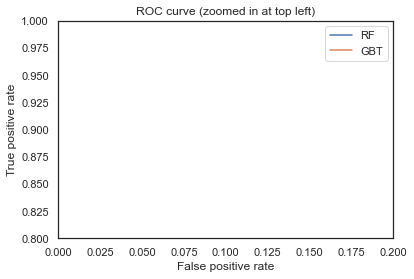

<Figure size 432x288 with 0 Axes>

In [250]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
# X, y = make_classification(n_samples=10000)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train_set, X_val, y_train_set, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
# X_train, X_train_lr, y_train, y_train_lr = train_test_split(
#     X_train, y_train, test_size=0.5)
# I need to improve prediction on clients Exiting Bank. Target data will be resampled. I decided to balance oversapmling data using SMOT.
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='all', random_state=42)
X_sm,y_sm=sm.fit_resample(X_train_set, y_train_set)
# Unsupervised transformation based on totally random trees
# rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
#                           random_state=0)

# rt_lm = LogisticRegression(max_iter=1000)
# pipeline = make_pipeline(rt, rt_lm)
# pipeline.fit(X_train, y_train)
# y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
# fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression(max_iter=1000)
rf.fit(X_sm, y_sm)
rf_enc.fit(rf.apply(X_sm))
rf_lm.fit(rf_enc.transform(rf.apply(X_val)), y_val)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)
grd.fit(X_sm, y_sm)
grd_enc.fit(grd.apply(X_sm)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_val)[:, :, 0]), y_val)

y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)
# # Supervised transformation based on XGBC boosted trees
# xgbc= XGBClassifier(n_estimator=n_estimator)
# xgbc_enc = OneHotEncoder()
# xgbc_lm = LogisticRegression(max_iter=1000)
# xgbc.fit(X_train, y_train)
# xgbc_enc.fit(xgbc.apply(X_train))
# xgbc_lm.fit(xgbc_enc.transform(xgbc.apply(X_val)), y_val)

# y_pred_xgbc_lm = xgbc_lm.predict_proba(xgbc_enc.transform(xgbc.apply(X_test)))[:, 1]
# fpr_xgbc_lm, tpr_xgbc_lm, _ = roc_curve(y_test, y_pred_xgbc_lm)

# #XGBC itself
# y_pred_xgbc=xgbc.predict_proba(X_test)[:1]
# fpr_xgbc, tpr_xgbc,_ =roc_curve(y_test,y_pred_xgbc)
# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
#plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
#plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
#plt.plot(fpr_xgbc,tpr_xgbc, label='XGBC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('SMOT_ROC_AUC_curve')

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.6, )
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
#plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
#plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
#plt.plot(fpr_xgbc,tpr_xgbc, label='XGBC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
plt.savefig('SMOT_ROC_AUC_zoom')